# Задание 2.0

## Подключаем нужные библиотеки

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Загружаем Dataset

Цена на золото за 10 лет

    Date:   дата торгов
    Close:  цена закрытия
    Volume: объем торгов в течение дня
    Open:   цена открытия
    High:   наивысшая цена за день
    Low:    наименьшая цена за день

Дополнительно для анализа были добавлены два столбца

    High_Low:   разница между наивысшой и наименьшой ценой
    Open_Close: разница между ценами открытия и закрытия

In [24]:
df = pd.read_csv("d:/goldstock.csv")
df = df['Date', 'Oppeead']
df['Date'] = pd.to_datetime(df['Date']) # заменяю дату как строковый объект на тип Date
# df["Date"] = (df["Date"]-df["Date"].iloc[-1])
# for i, f in enumerate(df["Date"]):
#     df["Date"][i] = f.days
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


## 2.1. Построить более сложную модель с подбором гиперпараметров – 10б

В рамках данной точки необходимо использовать более сложную модель для решения задачи,  оптимизировать гиперпараметры и оценить ее качество.

Критерии оценки:

- Выбрана более сложная ML-модель - 1б.

- Произведен подбор гиперпараметров с использованием кросс-валидации - 4б.

- Выбранная модель обучена с лучшими подобранными значениями гиперпараметров - 4б.

- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 1б.

<Axes: >

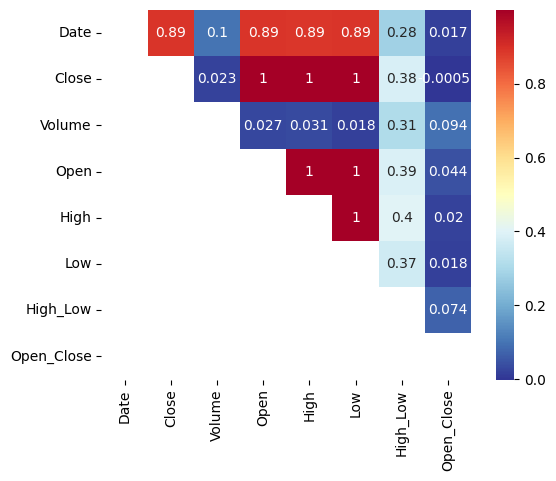

In [19]:
corrs = df.corr()
corrs = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
sns.heatmap(corrs, cmap="RdYlBu_r",  square=True, annot=True)

In [20]:
X, y = df["Date"], df["Open"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

t_split = TimeSeriesSplit(n_splits=2)
train, test = t_split.split (X, y)
n_split = 1
i_train, i_test = train[n_split], test[n_split]
X_train, X_test, y_train, y_test = X[i_train], X[i_test], y[i_train], y[i_test]


<Axes: ylabel='Density'>

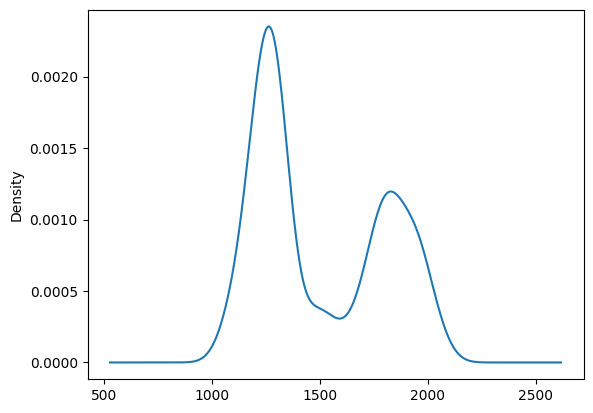

In [23]:
y.plot(kind='kde')